# Homework
Create a Q-learning algo for the CartPole-v0 game

In [ ]:
!apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
!pip install -q -U tf-agents-nightly pyvirtualdisplay gym[atari]

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [60.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [ ]:
import gym

from tensorflow import keras
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

In [ ]:
env = gym.make('CartPole-v0')
env._max_episode_steps = 400

In [ ]:
try:
    import pyvirtualdisplay
    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
except ImportError:
    pass

In [ ]:
env.seed(42)

frames = []
stop = 0

obs = env.reset()

for step in range(400):
    img = env.render(mode="rgb_array")
    
    action = 0 # this is a terrible policy...

    obs, reward, done, info = env.step(action)
    frames.append(img)

    # For the animation we keep printing frames for 50 steps
    stop += done
    if stop > 50:
      break

len(frames)

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


58

In [ ]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=20):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [ ]:
plot_animation(frames)

# Basic Policy

In [ ]:
def basic_policy(obs):
  angle = obs[2]
  if angle < 0:
    return 0
  else: 
    return 1

totals = []
for episode in range(500):
  episode_rewards = 0
  obs = env.reset()
  for step in range(400):
    action = basic_policy(obs)
    obs, reward, done, info = env.step(action)
    episode_rewards += reward
    if done:
      break
  totals.append(episode_rewards)

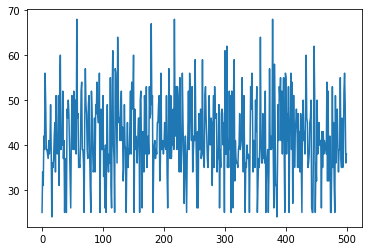

In [ ]:
plt.plot(totals) #we want it to survive to 400, this is not a good policy 

In [ ]:
import numpy as np

np.mean(totals), np.std(totals), np.min(totals), np.max(totals) #on average 42 steps 

(41.684, 8.839917646675222, 24.0, 68.0)

In [ ]:
#playing it only once to plot the image 
env.seed(42)

frames = []

obs = env.reset()
for step in range(400):
  img = env.render(mode="rgb_array")

  action = basic_policy(obs)

  obs,reward, done, infor = env.step(action)
  frames.append(img)
  if done:
    print("done!")
    break

done!


In [ ]:
#better than the previous one, but still not good
plot_animation(frames)

# Q-learning

In [ ]:
print(env.observation_space.high)
print(env.observation_space.low)
print(env.action_space.n)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
2


In [ ]:
# QT_SIZE = [20] * len(env.observation_space.high)
# window_size = (env.observation_space.high - env.observation_space.low) / QT_SIZE

# print(window_size)

In [ ]:
# q_table = np.random.uniform(low=-2, high=0, size=(QT_SIZE + [env.action_space.n]))
# q_table.shape

In [ ]:
LEARNING_RATE = 0.1
# Between 0 and 1, mesue of how much we carre about future reward over immedate reward
DISCOUNT = 0.95
RUNS = 10000  # Number of iterations run
SHOW_EVERY = 2000  # How oftern the current solution is rendered
UPDATE_EVERY = 100  # How oftern the current progress is recorded

In [ ]:
# Exploration settings
epsilon = 1  # not a constant, going to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = RUNS // 2
epsilon_decay_value = epsilon / (END_EPSILON_DECAYING - START_EPSILON_DECAYING)

In [ ]:
# def get_discrete_state(state):
#   discrete_state = (state - env.observation_space.low) / window_size
#   return tuple(discrete_state.astype(np.int))

# discrete_state = get_discrete_state(env.reset()) # returns only the initial state

# print("Starting State    :", discrete_state)
# print("Starting Q-Values :", q_table[discrete_state])
# print("Starting Action   :", np.argmax(q_table[discrete_state]))

In [ ]:
# Create bins and Q table
def create_bins_and_q_table():
	# env.observation_space.high
	# [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
	# env.observation_space.low
	# [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]

	# remove hard coded Values when I know how to

	numBins = 20
	obsSpaceSize = len(env.observation_space.high)

	# Get the size of each bucket
	bins = [
		np.linspace(-4.8, 4.8, numBins),
		np.linspace(-4, 4, numBins),
		np.linspace(-.418, .418, numBins),
		np.linspace(-4, 4, numBins)
	]

	qTable = np.random.uniform(low=-2, high=0, size=([numBins] * obsSpaceSize + [env.action_space.n]))

	return bins, obsSpaceSize, qTable

In [ ]:
#Given a state of the enviroment, return its descreteState index in qTable
def get_discrete_state(state, bins, obsSpaceSize):
	stateIndex = []
	for i in range(obsSpaceSize):
		stateIndex.append(np.digitize(state[i], bins[i]) - 1) # -1 will turn bin into index
	return tuple(stateIndex)


bins, obsSpaceSize, qTable = create_bins_and_q_table()

previousCnt = []  # array of all scores over runs
metrics = {'ep': [], 'avg': [], 'min': [], 'max': []}  # metrics recorded for graph

for run in range(RUNS):
	discreteState = get_discrete_state(env.reset(), bins, obsSpaceSize)
	done = False  # has the enviroment finished?
	cnt = 0  # how may movements cart has made

	while not done:
		if run % SHOW_EVERY == 0:
			env.render()  # if running RL comment this out

		cnt += 1
		# Get action from Q table
		if np.random.random() > epsilon:
			action = np.argmax(qTable[discreteState])
		# Get random action
		else:
			action = np.random.randint(0, env.action_space.n)
		newState, reward, done, _ = env.step(action)  # perform action on enviroment

		newDiscreteState = get_discrete_state(newState, bins, obsSpaceSize)

		maxFutureQ = np.max(qTable[newDiscreteState])  # estimate of optiomal future value
		currentQ = qTable[discreteState + (action, )]  # old value

		# pole fell over / went out of bounds, negative reward
		if done and cnt < 200: #200 based on game's rule
			reward = -375

		# formula to caculate all Q values
		newQ = (1 - LEARNING_RATE) * currentQ + LEARNING_RATE * (reward + DISCOUNT * maxFutureQ)
		qTable[discreteState + (action, )] = newQ  # Update qTable with new Q value

		discreteState = newDiscreteState

	previousCnt.append(cnt)

	# Decaying is being done every run if run number is within decaying range
	if END_EPSILON_DECAYING >= run >= START_EPSILON_DECAYING:
		epsilon -= epsilon_decay_value

	# Add new metrics for graph
	if run % UPDATE_EVERY == 0:
		latestRuns = previousCnt[-UPDATE_EVERY:]
		averageCnt = sum(latestRuns) / len(latestRuns)
		metrics['ep'].append(run)
		metrics['avg'].append(averageCnt)
		metrics['min'].append(min(latestRuns))
		metrics['max'].append(max(latestRuns))
		print("Run:", run, "Average:", averageCnt, "Min:", min(latestRuns), "Max:", max(latestRuns))


env.close()

Run: 0 Average: 12.0 Min: 12 Max: 12
Run: 100 Average: 38.9 Min: 10 Max: 120
Run: 200 Average: 56.86 Min: 26 Max: 147
Run: 300 Average: 62.27 Min: 31 Max: 147
Run: 400 Average: 61.47 Min: 28 Max: 134
Run: 500 Average: 65.28 Min: 30 Max: 149
Run: 600 Average: 69.75 Min: 29 Max: 290
Run: 700 Average: 82.8 Min: 31 Max: 225
Run: 800 Average: 98.69 Min: 34 Max: 257
Run: 900 Average: 108.21 Min: 45 Max: 322
Run: 1000 Average: 96.82 Min: 41 Max: 229
Run: 1100 Average: 109.49 Min: 36 Max: 400
Run: 1200 Average: 108.54 Min: 43 Max: 275
Run: 1300 Average: 125.37 Min: 28 Max: 400
Run: 1400 Average: 113.6 Min: 30 Max: 305
Run: 1500 Average: 125.61 Min: 36 Max: 339
Run: 1600 Average: 125.22 Min: 30 Max: 267
Run: 1700 Average: 127.44 Min: 34 Max: 346
Run: 1800 Average: 132.5 Min: 32 Max: 302
Run: 1900 Average: 127.42 Min: 36 Max: 267
Run: 2000 Average: 134.59 Min: 43 Max: 313
Run: 2100 Average: 140.87 Min: 33 Max: 400
Run: 2200 Average: 142.9 Min: 51 Max: 386
Run: 2300 Average: 139.89 Min: 36 Max: 3

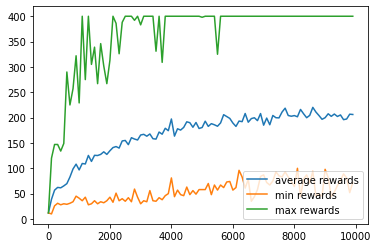

In [ ]:
# Plot graph
plt.plot(metrics['ep'], metrics['avg'], label="average rewards")
plt.plot(metrics['ep'], metrics['min'], label="min rewards")
plt.plot(metrics['ep'], metrics['max'], label="max rewards")
plt.legend(loc=4)
plt.show()

In [32]:
previousCnt[-1]

345

In [ ]:
get_discrete_state(env.reset(), bins, obsSpaceSize)

(9, 9, 8, 9)

In [ ]:
frames = []
discrete_state = get_discrete_state(env.reset(), bins, obsSpaceSize)
done = False

In [ ]:
while not done:
  action = np.argmax(qTable[discreteState])
  newState, reward, done, _ = env.step(action)
  discreteState = get_discrete_state(newState, bins, obsSpaceSize)

  img = env.render(mode="rgb_array")
  frames.append(img)

plot_animation(frames)